The purpose of this notebook is to show the distribution of homes on various features.

In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

Vendor:  Continuum Analytics, Inc.
Package: mkl
Message: trial mode expires in 20 days


In [2]:
from create_df import read_df
df, dfc, all_homes, appliance_min, national_average = read_df()

In [3]:
#Homes, Features
df.shape


(57, 166)

In [7]:
from common_functions import latexify, format_axes
latexify()

In [5]:
%matplotlib inline

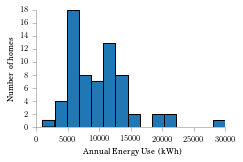

In [42]:
latexify()
dfc[['aggregate_%d' %i for i in range(1, 13)]].sum(axis=1).hist(bins=15)
plt.xlabel("Annual Energy Use (kWh)")
plt.ylabel("Number of homes");
ax = plt.gca()
plt.grid(False)
format_axes(ax)
plt.savefig("/Users/nipunbatra/git/monthly-disaggregation/results/description_energy.pdf",bbox_inches="tight")
plt.savefig("/Users/nipunbatra/git/monthly-disaggregation/results/description_energy.png",bbox_inches="tight")

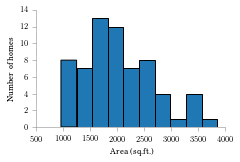

In [43]:
dfc.area.hist()
plt.xlabel("Area (sq.ft.)")
plt.ylabel("Number of homes");
format_axes(plt.gca())
plt.grid(False)
plt.savefig("/Users/nipunbatra/git/monthly-disaggregation/results/description_area.pdf",bbox_inches="tight")
plt.savefig("/Users/nipunbatra/git/monthly-disaggregation/results/description_areapng",bbox_inches="tight")

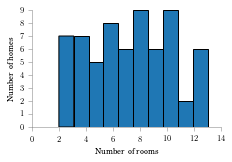

In [44]:
dfc.num_rooms.hist()
plt.xlabel("Number of rooms")
plt.ylabel("Number of homes");
format_axes(plt.gca())
plt.grid(False)
plt.savefig("/Users/nipunbatra/git/monthly-disaggregation/results/description_num_rooms.pdf",bbox_inches="tight")
plt.savefig("/Users/nipunbatra/git/monthly-disaggregation/results/description_num_rooms.png",bbox_inches="tight")

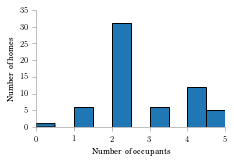

In [45]:
dfc.total_occupants.hist()
plt.xlabel("Number of occupants")
plt.ylabel("Number of homes");
format_axes(plt.gca())
plt.grid(False)
plt.savefig("/Users/nipunbatra/git/monthly-disaggregation/results/description_num_occupants.pdf",bbox_inches="tight")
plt.savefig("/Users/nipunbatra/git/monthly-disaggregation/results/description_num_occupants.png",bbox_inches="tight")

In [25]:
out = {}
for month in range(1, 13):
    out[month] = {}
    appliances = ["fridge","hvac","dr","dw","wm","light"]
    for appliance in appliances[:]:
        prop = dfc["%s_%d" %(appliance, month)].fillna(0).div(dfc["aggregate_%d" %month])
        prop = prop.replace([np.inf, -np.inf], np.nan)
        prop = prop.dropna()
        out[month][appliance] = prop[prop>0].mean()

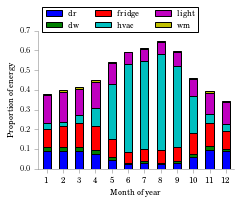

In [37]:
latexify(fig_height=2.6)
pd.DataFrame(out).T.plot(kind="bar",stacked=True, rot=0).legend(loc='upper left', bbox_to_anchor=(0, 1.2), ncol=3)
plt.xlabel("Month of year")
plt.ylabel("Proportion of energy");
format_axes(plt.gca())
plt.tight_layout()
plt.savefig("/Users/nipunbatra/git/monthly-disaggregation/results/proportion_energy.pdf",bbox_inches="tight")
plt.savefig("/Users/nipunbatra/git/monthly-disaggregation/results/proportion_energy.png",bbox_inches="tight")

In [38]:
units = {}
for month in range(1, 13):
    units[month] = {}
    appliances = ["fridge","hvac","dr","dw","wm","light"]
    for appliance in appliances[:]:
        a = df["%s_%d" %(appliance, month)].fillna(0)
        units[month][appliance] = a[a>0].mean()

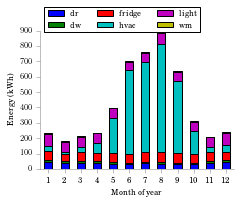

In [40]:
latexify(fig_height=2.6)
pd.DataFrame(units).T.plot(kind="bar",stacked=True, rot=0).legend(loc='upper left', bbox_to_anchor=(0, 1.2), ncol=3)
plt.xlabel("Month of year")
plt.ylabel("Energy (kWh)");
format_axes(plt.gca())
plt.tight_layout()
plt.savefig("/Users/nipunbatra/git/monthly-disaggregation/results/appliance_energy.pdf",bbox_inches="tight")
plt.savefig("/Users/nipunbatra/git/monthly-disaggregation/results/appliance_energy.png",bbox_inches="tight")